In [3]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [4]:
data = pd.read_csv("otu.csv", dtype = "unicode")
data.head()

,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10,...,Sample262,Sample263,Sample264,Sample265,Sample266,Sample267,Sample268,Sample269,Sample270,Sample271
0,left,left,left,left,left,left,left,left,left,left,...,right,right,right,right,right,right,right,right,right,right
1,0.33364,0.62579,0,0,0.56233,0,0,0,0,0,...,0,6.11234,0,0,0,0,0,0,0,0
2,0.33364,0.62579,0,0,0.56233,0,0,0,0,0,...,0,6.11234,0,0,0,0,0,0,0,0
3,0.33364,0.62579,0,0,0.56233,0,0,0,0,0,...,0,6.10627,0,0,0,0,0,0,0,0
4,0.33364,0.62579,0,0,0.56233,0,0,0,0,0,...,0,6.10627,0,0,0,0,0,0,0,0


In [5]:
data.shape

(3303, 271)

In [6]:
data.drop(data.columns[(data == 0).all()], axis=1) #dropping the rows which's entire values are 0

,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10,...,Sample262,Sample263,Sample264,Sample265,Sample266,Sample267,Sample268,Sample269,Sample270,Sample271
0,left,left,left,left,left,left,left,left,left,left,...,right,right,right,right,right,right,right,right,right,right
1,0.33364,0.62579,0,0,0.56233,0,0,0,0,0,...,0,6.11234,0,0,0,0,0,0,0,0
2,0.33364,0.62579,0,0,0.56233,0,0,0,0,0,...,0,6.11234,0,0,0,0,0,0,0,0
3,0.33364,0.62579,0,0,0.56233,0,0,0,0,0,...,0,6.10627,0,0,0,0,0,0,0,0
4,0.33364,0.62579,0,0,0.56233,0,0,0,0,0,...,0,6.10627,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3299,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3300,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3301,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
dataset = data.T
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,3293,3294,3295,3296,3297,3298,3299,3300,3301,3302
Sample1,left,0.33364,0.33364,0.33364,0.33364,0.33364,0.33364,0.33364,0.33364,0,...,0,0,0,0,0,0,0,0,0,0
Sample2,left,0.62579,0.62579,0.62579,0.62579,0.62579,0.62579,0.49776,0.49776,0.12802,...,0,0,0,0,0,0,0,0,0,0
Sample3,left,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sample4,left,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sample5,left,0.56233,0.56233,0.56233,0.56233,0.56233,0.56233,0.49446,0.49446,0.06786,...,0,0,0,0,0,0,0,0,0,0


In [8]:
label_encoder = preprocessing.LabelEncoder() #creating the label encoder object

In [9]:
dataset[0] = label_encoder.fit_transform(dataset[0])

In [10]:
X = dataset.iloc[:,1:]
y = dataset.iloc[:,0]
X=X.astype('float')
y=y.astype('float')

In [11]:
X.head()

,1,2,3,4,5,6,7,8,9,10,...,3293,3294,3295,3296,3297,3298,3299,3300,3301,3302
Sample1,0.33364,0.33364,0.33364,0.33364,0.33364,0.33364,0.33364,0.33364,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sample2,0.62579,0.62579,0.62579,0.62579,0.62579,0.62579,0.49776,0.49776,0.12802,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sample3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sample4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sample5,0.56233,0.56233,0.56233,0.56233,0.56233,0.56233,0.49446,0.49446,0.06786,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
y.head()

Sample1    0.0
Sample2    0.0
Sample3    0.0
Sample4    0.0
Sample5    0.0
Name: 0, dtype: float64

In [13]:
X.columns[(X == 0).all()] #features which are entirely 0

Int64Index([  18,   43,   44,  132,  206,  207,  208,  209,  210,  211,
            ...
            3293, 3294, 3295, 3296, 3297, 3298, 3299, 3300, 3301, 3302],
           dtype='int64', length=1915)

In [14]:
X.shape

(271, 3302)

In [15]:
X.drop(X.columns[(X == 0).all()], axis=1) #dropping those features
X.shape

(271, 3302)

In [16]:
sc = StandardScaler()
X=sc.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [18]:
#ADABOOST
ada_boost = AdaBoostClassifier(n_estimators=95, learning_rate=0.8, random_state=42)
model = ada_boost.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(y_test, y_pred)

0.6545454545454545

In [21]:
#XGBOOST
import xgboost as xgb

In [22]:
data_dmatrix = xgb.DMatrix(data=X, label=y)

In [23]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [24]:
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, predictor='auto', ...)

In [25]:
preds = xg_reg.predict(X_test).round()
preds

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 1., 0.], dtype=float32)

In [26]:
accuracy_score(y_test, preds)

0.6181818181818182

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='510', ylabel='Count'>

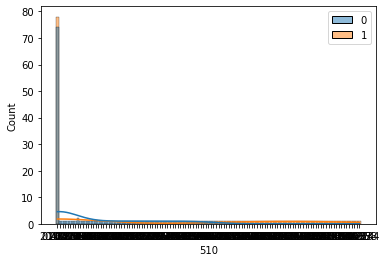

In [30]:
sns.histplot(data=dataset, x=, kde=True, color="skyblue", hue=dataset[0])